# Krótki przewodnik wizualizacji danych



In [2]:
#importujemy potrzebne biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Wczytana zostaje baza danych na temat ludzi uczęszczających na kurs by zmienić pracę na taką związną z Data Science oraz Big Data
df = pd.read_csv("aug_test.csv")
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
#Dane na temat klientów pewnej firmy 
df_kl = pd.read_csv("Wyzwania Data Science_Machine Learning/Customers.csv",index_col ='CustomerId' ,sep = ';', decimal = ',')
df_kl.head()

,Profit,Recency,Frequency,Monetary,Variance
CustomerId,,,,,
1,187,63,1,2349.06,2
2,96,10,6,922.62,4
3,47,35,4,881.22,3
4,294,5,1,3815.16,2
5,732,4,31,41868.11,29


In [4]:
#Dane historyczne na temat kryptowaluty Ethereum
df_eth = pd.read_csv("ETH-USD.csv")
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


## Najważniejsze zasady 

### 1. Wykres nie powinien być zwodniczy i wprowadzać oglądającego w błąd

Nie wolno manipulować wykresami aby sprawiać mylące wrażenie i korzystać z nieuwagi oraz braku wiedzy ludzi na temat czytania wykresów. Dane z jednej kategorii powinny być przedstawiane na jednym wykresie, w tej samej skali i tym samym zakresem na osi X i Y. Oś Y powinny rozpoczynać się od 0. 

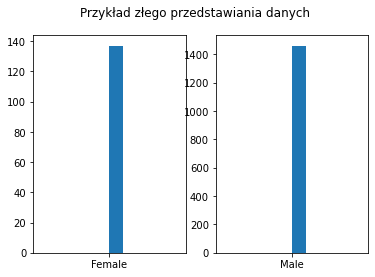

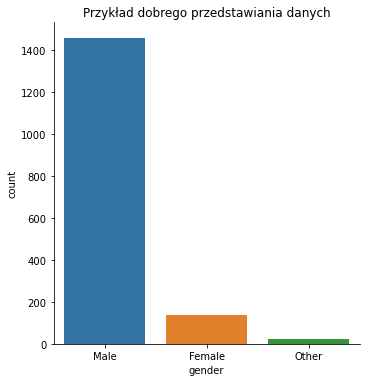

In [5]:
fig, ax = plt.subplots(1,2)
female = df['gender'].loc[df['gender']=='Female']
male = df['gender'].loc[df['gender']=='Male']
ax[0].hist(female)
ax[1].hist(male)
fig.suptitle("Przykład złego przedstawiania danych")
plt.show()

sns.catplot(x = 'gender', data = df, kind = 'count')
plt.title("Przykład dobrego przedstawiania danych")
plt.show()

### 2. Wizualizacje muszą być estetyczne 
Ważne jest użycie kolorów i kształtów na naszą korzyść, ale nie przesadzać. Kiedy pokazujemy różne kategorie, kolory powinny być od siebie jak najbardziej różne. Natomiast gdy mamy do czynienia z danymi ciągłymi lub nasze kategorie jesteśmy w stanie uporządkować w pewnej kolejności, korzystamy z kolorów przechodzących z jednego w drugi.

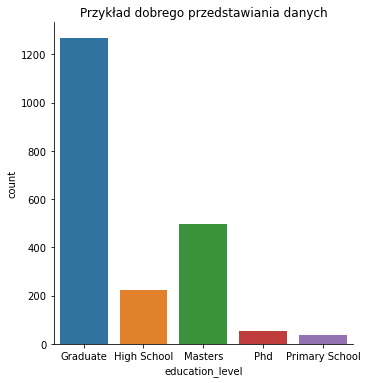

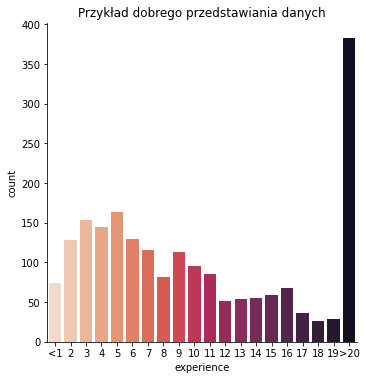

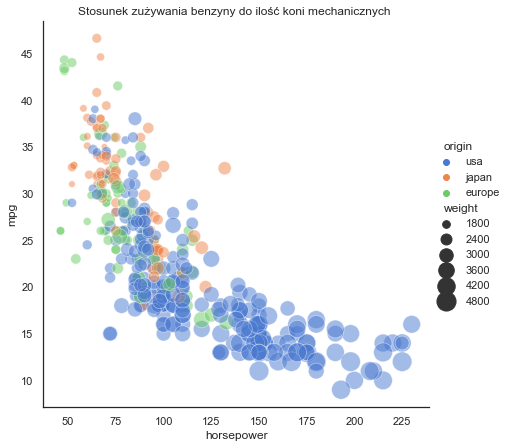

In [6]:
sns.catplot(x = 'education_level', data = df, kind = 'count')
plt.title("Przykład dobrego przedstawiania danych")
plt.show()

category_order = ["<1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19",">20"]
sns.catplot(x = 'experience', data = df, kind = 'count', order = category_order, palette = 'rocket_r')
plt.title("Przykład dobrego przedstawiania danych")
plt.show()

sns.set_theme(style="white")

mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)
plt.title("Stosunek zużywania benzyny do ilość koni mechanicznych ")
plt.show()

### 3. Odbiorca nie powinien mieć problemu z rozczytania wykresu
Nie wolno zapominać o takich rzeczach jak:
- tytuł wykresu
- podpisy osi X i Y
- jednostki w jakich są nasze dane
- legenda

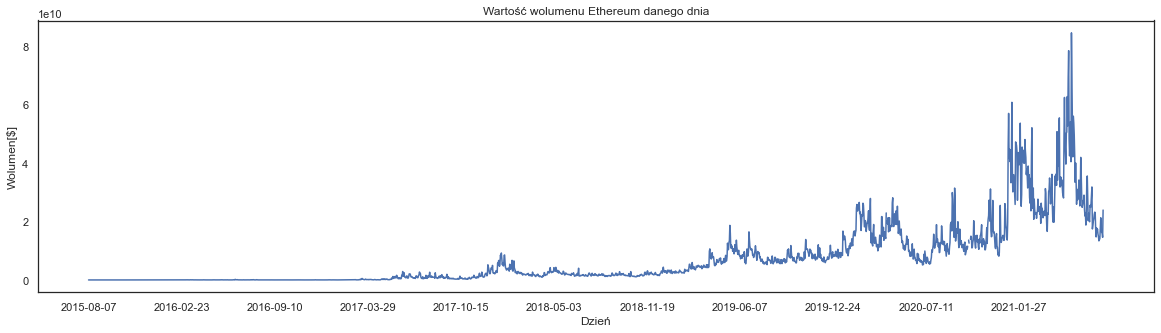

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(df_eth['Date'], df_eth['Volume'])
ax.set_xlabel("Dzień")
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_ylabel('Wolumen[$]')
ax.set_title("Wartość wolumenu Ethereum danego dnia")
plt.show()
fig.set_size_inches(20, 5)

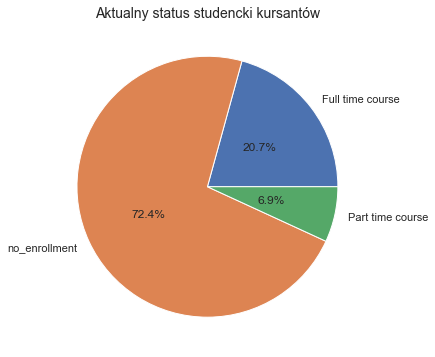

In [8]:
enroll = list(df['enrolled_university']).count("Full time course")
no_enroll = list(df['enrolled_university']).count("no_enrollment")
part_time = list(df['enrolled_university']).count("Part time course")
labels = df['enrolled_university'].dropna().unique()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=[enroll, no_enroll, part_time], autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Aktualny status studencki kursantów", fontsize=14)
plt.show()

### 4. Dane zawarte na wykresie nie mogą być złe 
Zawsze sprawdź dwa razy, czy użyte wzory są poprawne, czy źródło twoich danych jest sprawdzone oraz uważaj na błędy obliczeniowe

### 5. Różne typy danych powinny być wizualizowane w różny sposób
Typ wykresu trzeba dopasować zarówno do typów danych jak i do tego, co dokładnie chcemy, żeby nasza wizualizacja oddawała.
#### Rodzaje danych i odpowiadające im wykresy:
##### 1. Dane ilościowe:
Gdy chcemy wizualizować i porównywać ze sobą ilość najlepiej to zrobić korzystając z wykresu słupkowego - w pozycji horyznotalnej lub wertykalnej. Gdy mamy więcej niż jeden zestaw kategorii, których ilość chcemy ukazać, warto skorzystać z grupowanych lub skumulowanych wykresów słupkowych.

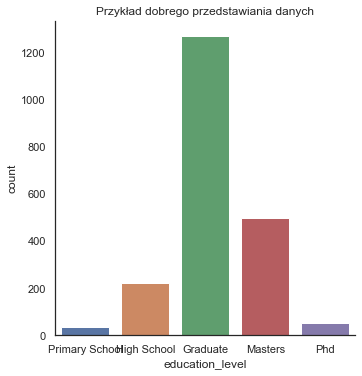

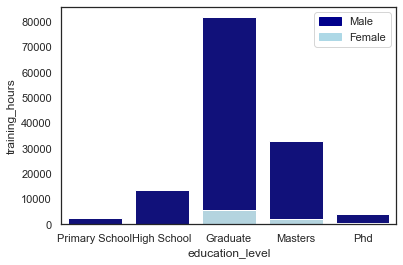

In [9]:
import matplotlib.patches as mpatches


order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
sns.catplot(x = 'education_level', data = df, kind = 'count', order = order)
plt.title("Przykład dobrego przedstawiania danych")
plt.show()

total = df.groupby('education_level')['training_hours'].sum().reset_index()
bar1 = sns.barplot(x="education_level",  y="training_hours", data=total, color='darkblue', order=order)
female = df[df.gender=='Female']

bar2 = sns.barplot(x="education_level", y="training_hours", data=female, estimator=sum, ci=None,  color='lightblue', order = order)
top_bar = mpatches.Patch(color='darkblue', label='Male')
bottom_bar = mpatches.Patch(color='lightblue', label='Female')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

##### 2. Rozkłady
Do ukazania rozkładów najlepsze są histogramy, wykresy gęstościowe, skumulowana gęstość i wykresy kwantylowe. Gdy chcemy zwizualizować kilka rozkładów na raz, przydatne są boxploty, violin ploty i sina ploty.

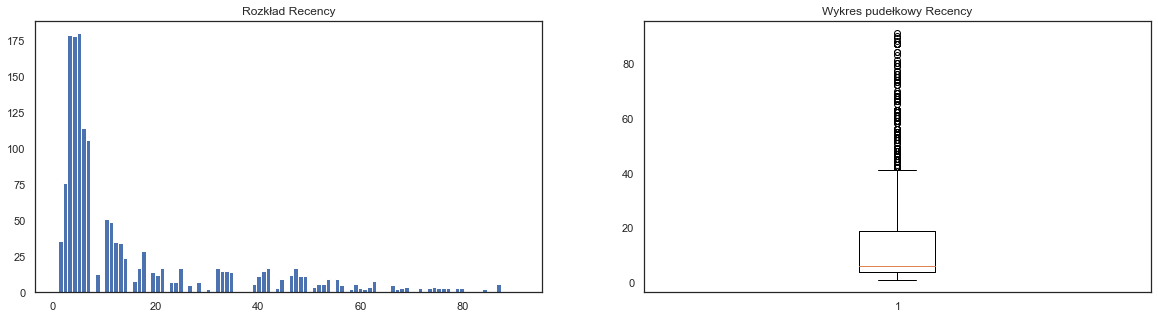

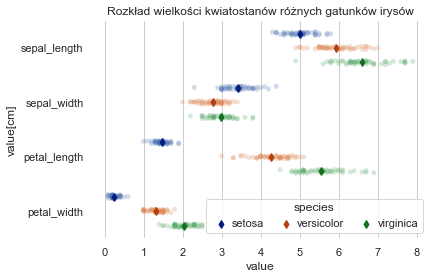

In [10]:
for col in df_kl.columns[1:2]:
    if col != 'CustomerID':
        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(20, 5)
        ax[0].hist(df_kl[col],bins = 100)
        ax[0].set_title("Rozkład " + col)
        ax[1].boxplot(x=df_kl[col])
        ax[1].set_title("Wykres pudełkowy " + col)
        plt.show()
        
sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")
iris = pd.melt(iris, "species", var_name="measurement")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.ylabel("value[cm]")
plt.title("Rozkład wielkości kwiatostanów różnych gatunków irysów")
plt.show()

##### 3. Proporcje
W wizualizacji proporcji przydają się wykresy kołowe, ułożone koło siebie lub nałożone wykresy słupkowe.

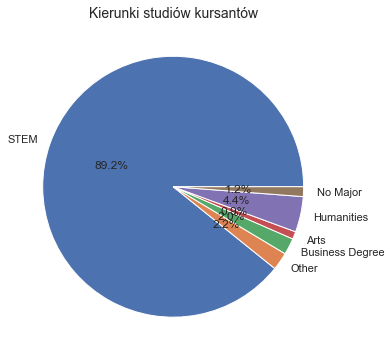

In [11]:
stem = list(df['major_discipline']).count('STEM')
other = list(df['major_discipline']).count('Other')
business = list(df['major_discipline']).count('Business Degree')
arts = list(df['major_discipline']).count("Arts")
humanities = list(df['major_discipline']).count("Humanities")
non = list(df['major_discipline']).count("No Major")
labels = df['major_discipline'].dropna().unique()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=[stem, other, business, arts, humanities,non], autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Kierunki studiów kursantów", fontsize=14)
plt.show()

##### 4. Dane relacyjne
Relacje x-y najlepiej wizualizować za pomocą wykresów punktowych, z samymi punktami bądź połączonymi linią, a w przypadku szeregów czasowych lub innych danych ciągłych wykresy liniowe. Inną popularną opcją jest bubble chart. W przypadku gdy mamy bardzo dużo danych, wykres punktowy może stać się niewyraźny. Wtedy przydatne stają się density contours i 2D bins.

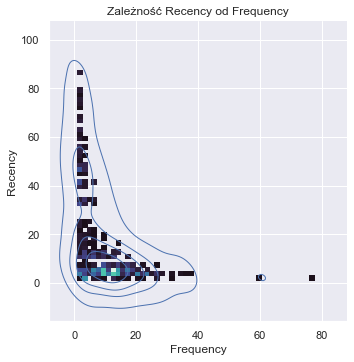

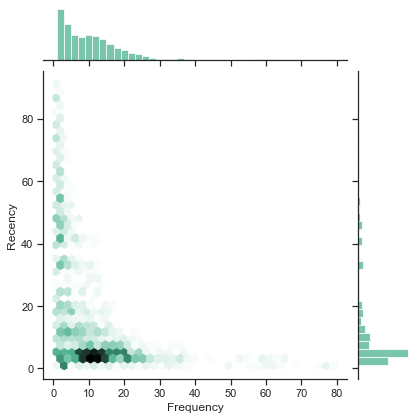

In [12]:
sns.set_theme(style="darkgrid")
sns.displot(x='Frequency', y='Recency', data = df_kl, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x='Frequency', y='Recency', data = df_kl, levels=5, color="b", linewidths=1)
plt.title("Zależność Recency od Frequency")
plt.show()

sns.set_theme(style="ticks")
sns.jointplot(x='Frequency', y='Recency', data = df_kl, kind="hex", color="#4CB391")
plt.show()

##### 5. Niepewności
Do pokazania zakresów niepewności używamy error bars dla wartości dyskretnych i confidence band przy wartościach ciągłych.

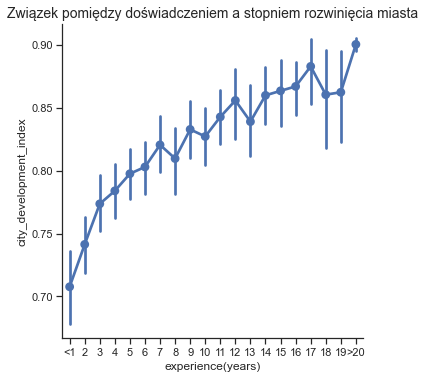

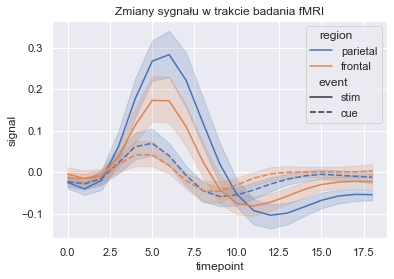

In [13]:
sns.catplot(x = 'experience', y = 'city_development_index', data = df, kind = 'point', order = category_order)
plt.xlabel("experience(years)")
plt.title("Związek pomiędzy doświadczeniem a stopniem rozwinięcia miasta", fontsize=14)
plt.show()
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)
plt.title("Zmiany sygnału w trakcie badania fMRI")
plt.show()

### 6. Używaj odpowiedniej skali
Skala logarytmiczna jest odpowiednia dla danych, które się zmieniających się logarytmicznie, skala liniowa dla danych zmieniających się liniowo, niektóre dane lepiej przedstawiać na mapach lub wykresach biegunowych

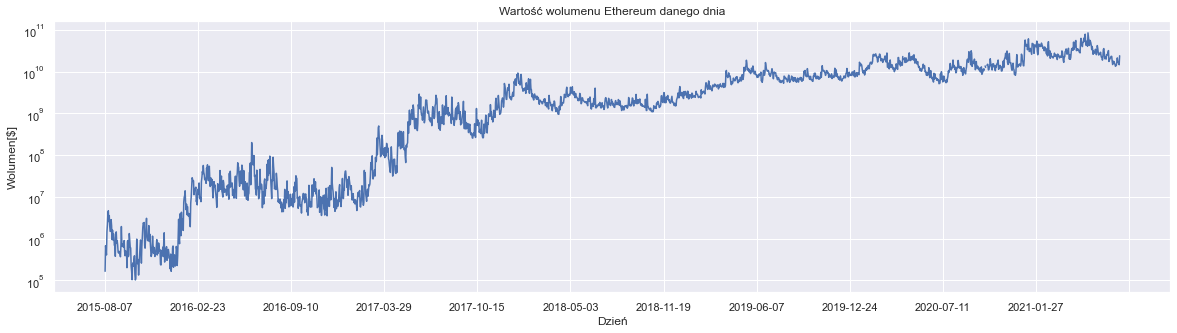

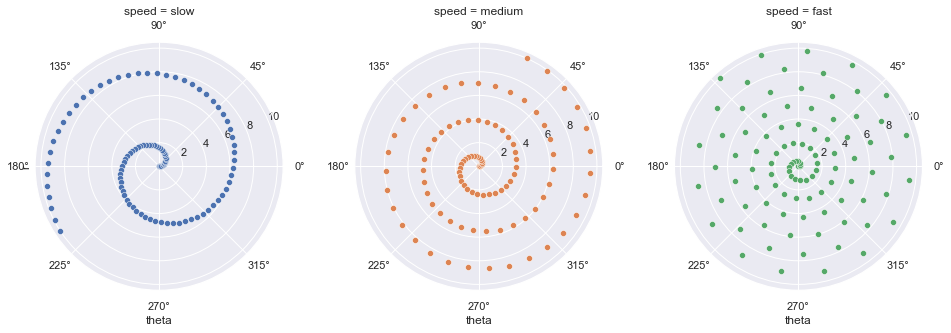

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(df_eth['Date'], df_eth['Volume'])
ax.set_xlabel("Dzień")
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_ylabel('Wolumen[$]')
ax.set_title("Wartość wolumenu Ethereum danego dnia")
plt.yscale("log")
plt.show()

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, "theta", "r")
plt.show()

Źródła:
- https://seaborn.pydata.org/examples/index.html
- https://learn.datacamp.com/skill-tracks/data-visualization-with-python
- https://www.oreilly.com/library/view/fundamentals-of-data/9781492031079/